Made using assistance from GenAI Tools

In [35]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import time, ast, csv, re
import pandas as pd

In [36]:
text_files = ["graph_data_20_edges.txt", "graph_data_40_edges.txt", "graph_data_60_edges.txt", "graph_data_80_edges.txt","graph_data_100_edges.txt", "graph_data_120_edges.txt", "graph_data_140_edges.txt", "graph_data_160_edges.txt","graph_data_180_edges.txt"]
dfs = []
for file in text_files:
  with open(file, "r") as f:
    edges = [ast.literal_eval(line.strip()) for line in f]

  num_edges = int(file.split("_")[2])
  df = pd.DataFrame({"Edges": edges, "Number of Edges":num_edges})
  dfs.append(df)

graph_data = pd.concat(dfs, ignore_index=True)
display(graph_data)

,Edges,Number of Edges
0,"(2, 19)",20
1,"(2, 6)",20
2,"(2, 11)",20
3,"(2, 12)",20
4,"(3, 10)",20
...,...,...
895,"(17, 20)",180
896,"(17, 18)",180
897,"(18, 19)",180
898,"(18, 20)",180


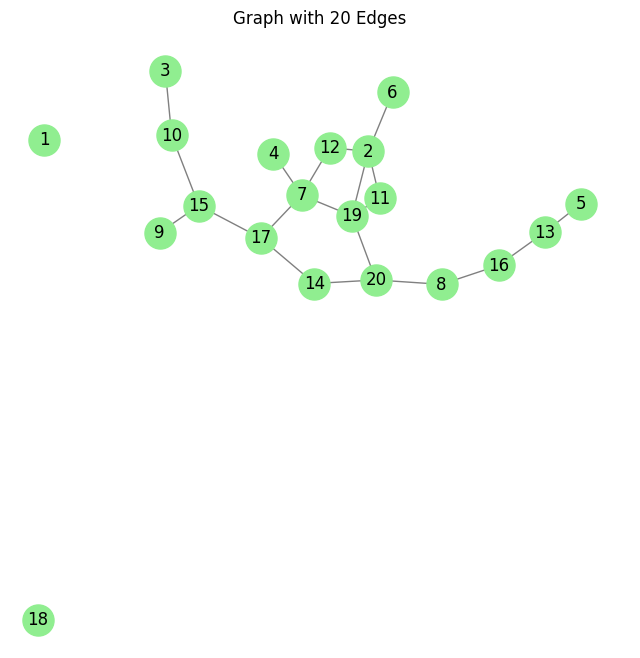

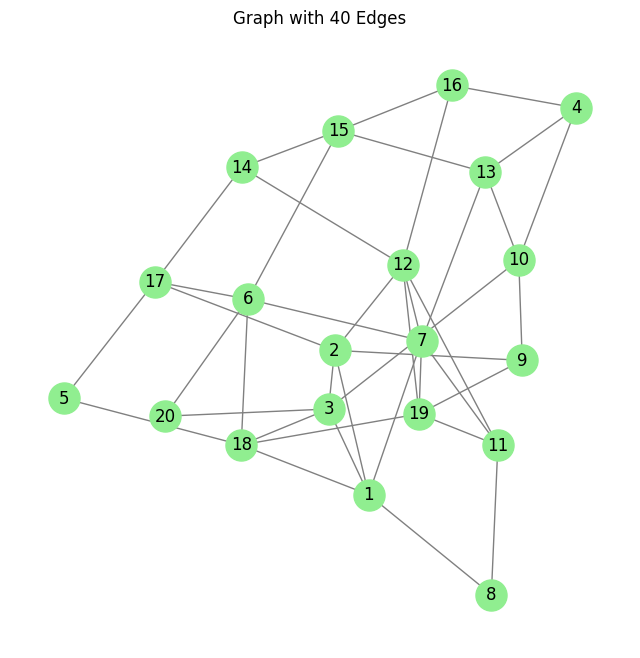

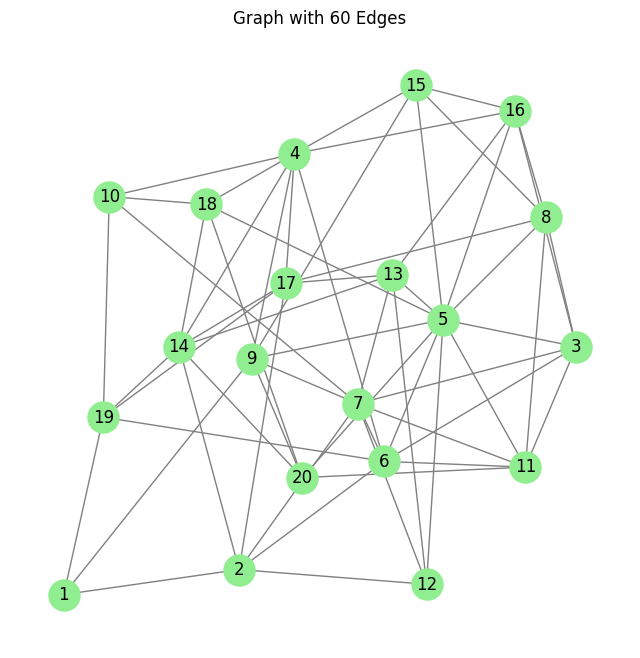

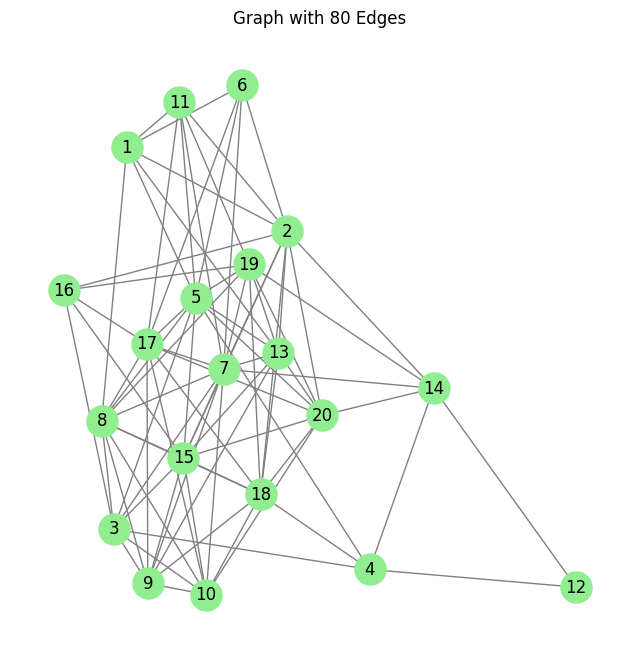

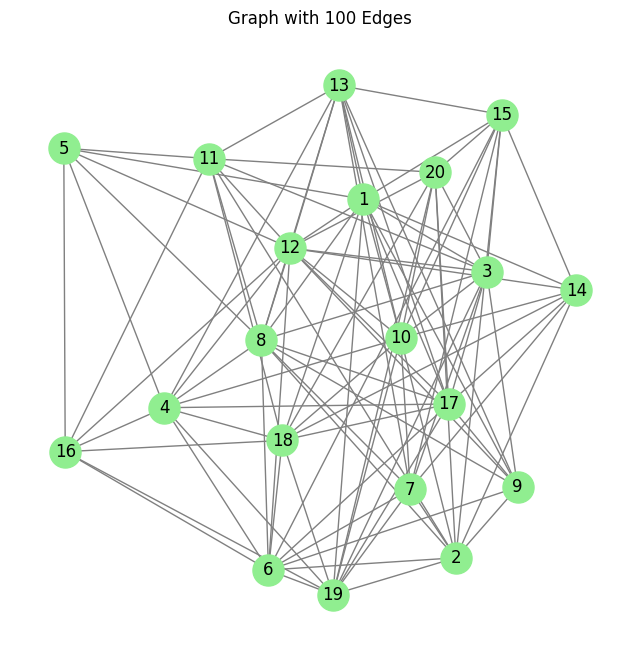

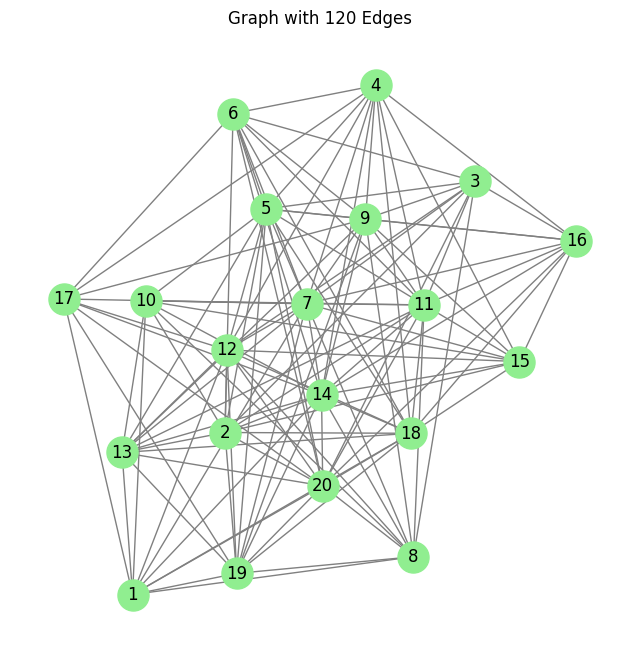

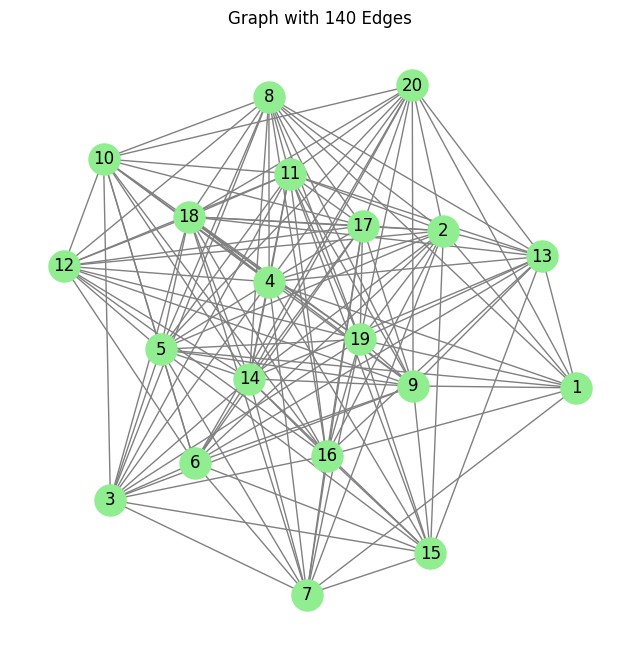

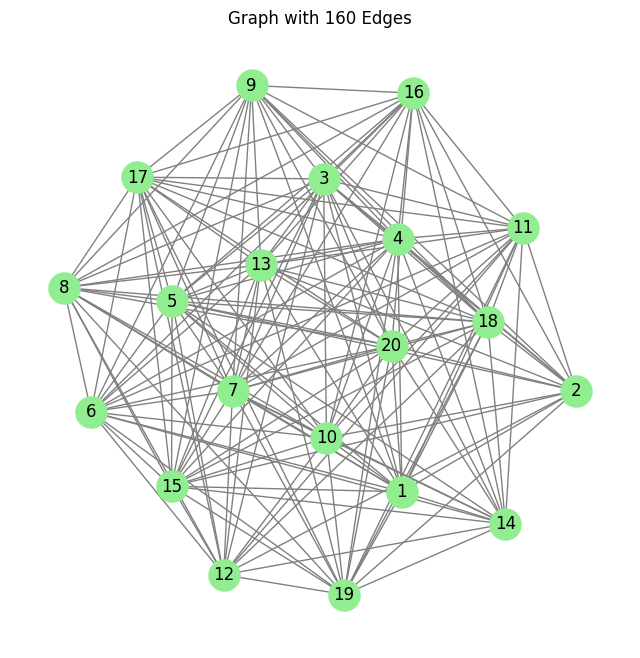

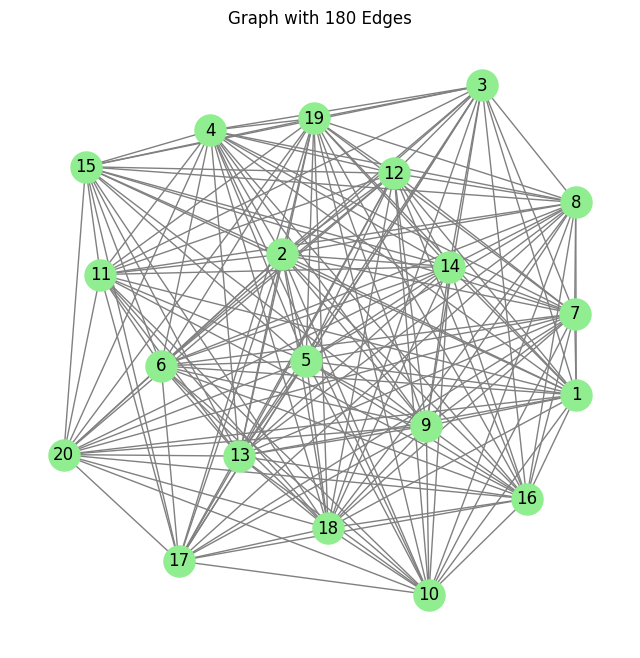

In [37]:
num_vertices = 20
graphs = {} # Store graphs in a dictionary

for num_edges, group in graph_data.groupby("Number of Edges"):
    G = nx.Graph()
    G.add_nodes_from(range(1, num_vertices + 1))

    for edge in group["Edges"]:
        G.add_edge(*edge)

    graphs[num_edges] = G # Store the generated graph

# Plot the graphs after the loop
for num_edges, G in graphs.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw(G, with_labels=True, ax=ax, node_size=500, node_color='lightgreen', edge_color='gray')
    ax.set_title(f"Graph with {num_edges} Edges")
    plt.show()
    print("\n")

# Run the brute force algorithm for the Vertex Cover problem. Record the size of the computed vertex cover and the running time.  

Refined code for Brute Force Algorithm using ChatGPT

In [38]:
minimum_vertex_covers = {}
timing_results = {}

num_vertices = 20 # n = 20 for m = 20, 30, 40, 50 ...,190

for num_edges, graph in graphs.items():
    edges = list(graph.edges())
    start_time = time.time() # tracking time taken to find vertex cover as m increases

    for k in range(1, num_vertices + 1):
        covers_of_size_k = []
        for subset in combinations(graph.nodes(), k): # iterating through every subset of the number of vertices to find the minimum cover
            is_vertex_cover = True
            for u, v in edges:
                if u not in subset and v not in subset:
                    is_vertex_cover = False
                    break
            if is_vertex_cover:
                covers_of_size_k.append(subset)


        if covers_of_size_k:

            break # Break out of the loop for k since we found the minimum size

    minimum_vertex_covers[num_edges] = covers_of_size_k
    end_time = time.time() # End timing
    timing_results[num_edges] = end_time - start_time

if not minimum_vertex_covers:
    print("No minimum vertex cover found for any graph.")
else:
    print("Minimum Vertex Covers:")
    for num_edges, cover_list in minimum_vertex_covers.items():
        print(f"Graph with {num_edges} edges:")
        for cover in cover_list:
             print(f"  Cover: {cover} Size: {len(cover)}")


print("\nTime taken to calculate Minimum Vertex Cover:")
for num_edges, elapsed_time in timing_results.items():
    print(f"Graph with {num_edges} edges: {elapsed_time:.6f} seconds")

Minimum Vertex Covers:
Graph with 20 edges:
  Cover: (2, 3, 7, 8, 13, 14, 15, 19) Size: 8
  Cover: (2, 7, 8, 10, 13, 14, 15, 19) Size: 8
Graph with 40 edges:
  Cover: (1, 2, 3, 5, 6, 7, 10, 11, 13, 14, 16, 19) Size: 12
  Cover: (1, 2, 3, 5, 6, 10, 11, 12, 13, 14, 16, 19) Size: 12
  Cover: (1, 2, 4, 7, 8, 10, 12, 15, 17, 18, 19, 20) Size: 12
  Cover: (1, 2, 4, 7, 9, 10, 11, 12, 15, 17, 18, 20) Size: 12
  Cover: (1, 2, 4, 7, 10, 11, 12, 15, 17, 18, 19, 20) Size: 12
  Cover: (1, 3, 4, 5, 6, 9, 11, 12, 13, 15, 17, 19) Size: 12
  Cover: (1, 3, 4, 6, 7, 9, 10, 11, 12, 15, 17, 18) Size: 12
  Cover: (1, 3, 4, 6, 7, 9, 11, 12, 13, 15, 17, 18) Size: 12
  Cover: (1, 3, 4, 6, 9, 11, 12, 13, 15, 17, 18, 19) Size: 12
  Cover: (1, 3, 4, 7, 9, 10, 11, 12, 15, 17, 18, 20) Size: 12
  Cover: (1, 3, 4, 7, 9, 11, 12, 13, 15, 17, 18, 20) Size: 12
  Cover: (2, 3, 4, 6, 7, 8, 10, 12, 15, 17, 18, 19) Size: 12
  Cover: (2, 3, 4, 7, 8, 10, 12, 15, 17, 18, 19, 20) Size: 12
Graph with 60 edges:
  Cover: (2, 3, 4, 

In [39]:
brute_force = []

for num_edges, cover_list in minimum_vertex_covers.items():
    if cover_list:
        # Just take the first cover found for each number of edges
        cover = cover_list[0]
        cover_size = len(cover)
        brute_force.append({
            'num_edges': num_edges,
            'vertex_cover': list(cover),
            'cover_size': cover_size,
            'time_taken': timing_results[num_edges]
        })

brute_force_results = pd.DataFrame(brute_force)
display(brute_force_results)

,num_edges,vertex_cover,cover_size,time_taken
0,20,"[2, 3, 7, 8, 13, 14, 15, 19]",8,0.289079
1,40,"[1, 2, 3, 5, 6, 7, 10, 11, 13, 14, 16, 19]",12,1.144967
2,60,"[2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 18, 19]",13,1.323403
3,80,"[1, 2, 3, 4, 5, 7, 8, 9, 12, 15, 17, 18, 19, 20]",14,1.627974
4,100,"[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 15, 16, 17, ...",15,2.019373
5,120,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 1...",16,2.076020
6,140,"[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 1...",16,2.814182
7,160,"[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...",17,3.143131
8,180,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",18,2.697311


# Run the greedy approximation algorithm for the Vertex Cover problem. Record the size of the computed vertex cover and the running time  

In [40]:
def maximal_matching(graph):
    matching = set()
    matched = set()

    for u, v in graph.edges():
        if u not in matched and v not in matched:
            matching.add((u, v))
            matched.update([u, v])

    return matching


def get_vertex_cover_from_matching(matching):
    vertex_cover = set()
    for u, v in matching:
        vertex_cover.add(u)
        vertex_cover.add(v)
    return vertex_cover

Printed and plotted results using Gemini

In [41]:
results = {}

for num_edges, graph in graphs.items():
    start_time = time.time() # Start timing
    max_match = maximal_matching(graph)
    vertex_cover = get_vertex_cover_from_matching(max_match)
    end_time = time.time() # End timing
    elapsed_time = end_time - start_time # Calculate elapsed time

    results[num_edges] = {
        "Matching": max_match,
        "Maximal Matching Size": len(max_match),
        "Vertex Cover Size": len(vertex_cover),
        "Time Taken (s)": elapsed_time # Add time taken to results
    }

for num_edges, result in results.items():
    print(f"Graph with {num_edges} Edges:")
    print(f"  Matching: {result['Matching']}")
    print(f"  Maximal Matching Size: {result['Maximal Matching Size']}")
    print(f"  Vertex Cover Size: {result['Vertex Cover Size']}")
    print(f"  Time Taken (s): {result['Time Taken (s)']:.6f}") # Display time with more precision
    print("-" * 20)

Graph with 20 Edges:
  Matching: {(14, 20), (8, 16), (3, 10), (5, 13), (2, 19), (9, 15), (4, 7)}
  Maximal Matching Size: 7
  Vertex Cover Size: 14
  Time Taken (s): 0.000059
--------------------
Graph with 40 Edges:
  Matching: {(4, 10), (1, 2), (6, 15), (9, 19), (5, 17), (7, 12), (3, 18), (8, 11)}
  Maximal Matching Size: 8
  Vertex Cover Size: 16
  Time Taken (s): 0.000043
--------------------
Graph with 60 Edges:
  Matching: {(9, 20), (1, 19), (13, 16), (6, 7), (2, 12), (8, 11), (4, 17), (10, 18), (3, 5)}
  Maximal Matching Size: 9
  Vertex Cover Size: 18
  Time Taken (s): 0.000040
--------------------
Graph with 80 Edges:
  Matching: {(5, 8), (3, 7), (11, 19), (6, 17), (10, 20), (1, 13), (9, 18), (4, 14), (2, 15)}
  Maximal Matching Size: 9
  Vertex Cover Size: 18
  Time Taken (s): 0.000057
--------------------
Graph with 100 Edges:
  Matching: {(3, 8), (12, 17), (11, 16), (2, 20), (10, 13), (4, 5), (7, 15), (14, 18), (6, 19), (1, 9)}
  Maximal Matching Size: 10
  Vertex Cover Siz

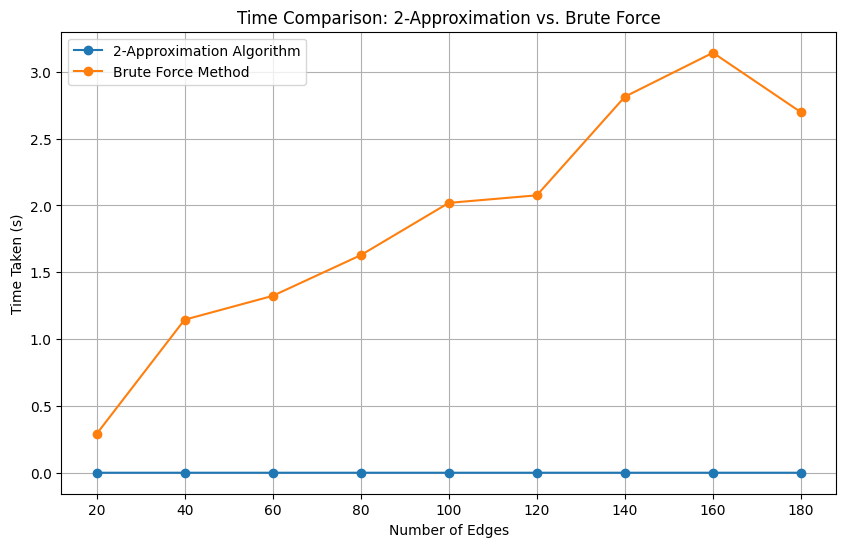

In [42]:
approx_results = pd.DataFrame(results).T.reset_index()
approx_results.columns = ['num_edges', 'Matching','Maximal Matching Size', 'Vertex Cover Size', 'Time Taken (s)']
time_comparison = pd.merge(
    approx_results[['num_edges', 'Time Taken (s)']].rename(columns={'Time Taken (s)': 'Approximation Time (s)'}),
    brute_force_results[['num_edges', 'time_taken']].rename(columns={'time_taken': 'Brute Force Time (s)'}),
    on='num_edges'
)


# Plot the time comparison
plt.figure(figsize=(10, 6))
plt.plot(time_comparison['num_edges'], time_comparison['Approximation Time (s)'], marker='o', linestyle='-', label='2-Approximation Algorithm')
plt.plot(time_comparison['num_edges'], time_comparison['Brute Force Time (s)'], marker='o', linestyle='-', label='Brute Force Method')

plt.xlabel('Number of Edges')
plt.ylabel('Time Taken (s)')
plt.title('Time Comparison: 2-Approximation vs. Brute Force')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
display(time_comparison)

,num_edges,Approximation Time (s),Brute Force Time (s)
0,20,0.000059,0.289079
1,40,0.000043,1.144967
2,60,0.00004,1.323403
3,80,0.000057,1.627974
4,100,0.000049,2.019373
5,120,0.000045,2.076020
6,140,0.000067,2.814182
7,160,0.000063,3.143131
8,180,0.000057,2.697311


# Compute the Approximation factor of greedy by comparing the results with those of brute force.

Using Gemini, made a dataframe to store comparisons.

In [44]:
comparison_df = pd.merge(approx_results, brute_force_results, on='num_edges')

# Calculate the approximation factor
comparison_df['Approximation Factor'] = comparison_df['Vertex Cover Size'] / comparison_df['cover_size']

# Select and display the relevant columns for comparing cover sizes and the approximation factor
print("\nApproximation Factor Comparison:")
approximation_factor_comparison_df = comparison_df[['num_edges','Matching', 'Vertex Cover Size', 'cover_size', 'Approximation Factor','Time Taken (s)','time_taken']]
approximation_factor_comparison_df = approximation_factor_comparison_df.rename(columns={
    'Vertex Cover Size': '2-Approximation Vertex Cover Size',
    'cover_size': 'Optimum Vertex Cover Size',
    'vertex_cover': 'Optimum Vertex Cover',
    "Matching": "Max Matching",
    "time_taken": "Time Taken (Brute Force)",
    "Time Taken (s)": "Approximation Time"
})

display(approximation_factor_comparison_df)


Approximation Factor Comparison:


,num_edges,Max Matching,2-Approximation Vertex Cover Size,Optimum Vertex Cover Size,Approximation Factor,Approximation Time,Time Taken (Brute Force)
0,20,"{(14, 20), (8, 16), (3, 10), (5, 13), (2, 19),...",14,8,1.75,0.000059,0.289079
1,40,"{(4, 10), (1, 2), (6, 15), (9, 19), (5, 17), (...",16,12,1.333333,0.000043,1.144967
2,60,"{(9, 20), (1, 19), (13, 16), (6, 7), (2, 12), ...",18,13,1.384615,0.00004,1.323403
3,80,"{(5, 8), (3, 7), (11, 19), (6, 17), (10, 20), ...",18,14,1.285714,0.000057,1.627974
4,100,"{(3, 8), (12, 17), (11, 16), (2, 20), (10, 13)...",20,15,1.333333,0.000049,2.019373
5,120,"{(7, 16), (12, 13), (1, 20), (8, 19), (5, 10),...",20,16,1.25,0.000045,2.076020
6,140,"{(3, 4), (11, 13), (10, 17), (8, 19), (2, 6), ...",18,16,1.125,0.000067,2.814182
7,160,"{(5, 15), (9, 13), (8, 17), (2, 10), (14, 20),...",20,17,1.176471,0.000063,3.143131
8,180,"{(9, 16), (10, 11), (5, 8), (3, 17), (6, 20), ...",20,18,1.111111,0.000057,2.697311


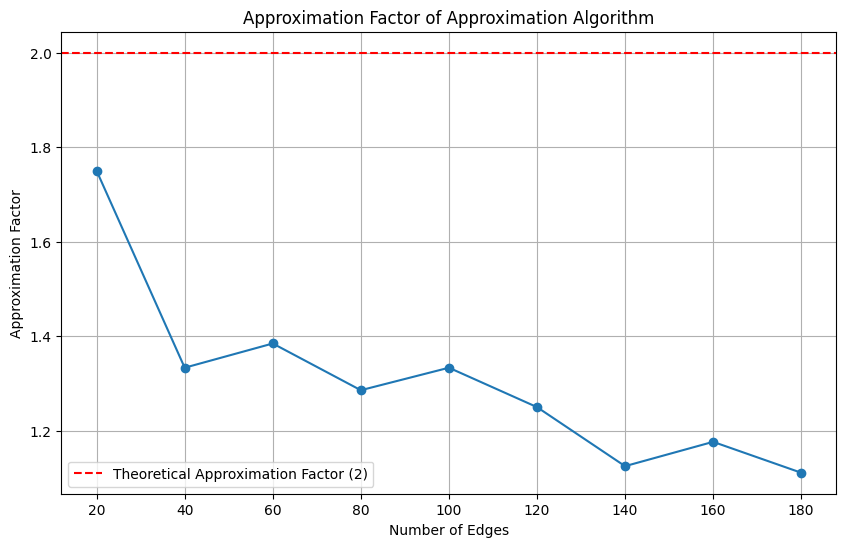

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(approximation_factor_comparison_df['num_edges'], approximation_factor_comparison_df['Approximation Factor'], marker='o', linestyle='-')
plt.axhline(y=2, color='r', linestyle='--', label='Theoretical Approximation Factor (2)')
plt.xlabel('Number of Edges')
plt.ylabel('Approximation Factor')
plt.title('Approximation Factor of Approximation Algorithm')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
approximation_factor_comparison_df.to_csv('approximation_factor_comparison.csv', index=False)
